# Non-Linear Kater's Pendulum

First we derive an equation of motion for the pendulum:

$\sum\tau=\tau_g=-\lvert\vec{F_g}\times\vec{d}\rvert=-Mgd\sin\theta=I_0\ddot{\theta}$

Where $\tau$ is the torque, $M$ is the total mass of the pendulum, $g$ is the gravitational constant, $d$ is the distance from the centre of mass to the point about which the pendulum is rotating, $I_0$ is the moment of inertia about the point of roatation, and $\ddot{\theta}$ is the angular acceleration.

Rearranging our equation of motion we get:

$\ddot{\theta}+\frac{Mgd}{I_0}\sin\theta=0$

This is a second order differential equation. The solution to this differential equation is not elementary, however, an exact analytical solution does exist in terms of Jacobi Elliptic Functions.

Following the derivation here: https://medium.com/physicsfromscratch/a-complete-solution-to-the-non-linear-pendulum-9afda0b64926

We get the solution:

$\theta(t)=2\arcsin(k\cdot cd(t\sqrt{\frac{Mgd}{I_0}}, k))$

Where $k$ is the elliptic modulus and $0 \le k^2 \le 1$.

However we also need an expression for the time period.

In the derivation we saw that:

$\frac{d\theta}{dt}=\sqrt{\frac{2Mgd}{I_0}(\cos(\theta)-\cos(\theta_0))}$

and so:

$\frac{dt}{d\theta}=\sqrt{\frac{I_0}{2Mgd}}\frac{1}{\sqrt{\cos(\theta)-\cos(\theta_0)}}$

From this we can derive an equation for the time period:

$T=4\sqrt{\frac{I_0}{2Mgd}}\int_{0}^{\theta_0}\frac{d\theta}{\sqrt{cos(\theta)-cos(\theta_0)}}$

This time period can be written in terms of an elliptic integral

$T=4\sqrt{\frac{I_0}{Mgd}}K(k)$

Where $k=\sin\frac{\theta_0}{2}$ and $K(k)$ is a complete elliptic integral of the first kind defined by

$K(k)=F(\frac{\pi}{2}, k)=\int_{0}^{\frac{\pi}{2}}\frac{du}{\sqrt{1-k^2sin^2(u)}}$

And so, from the moment of inertia calculated in the linear pendulum model:

$T_1=4\sqrt{\frac{I_c+Ml^2_1}{Mgl_1}}K(k)$

$T_2=4\sqrt{\frac{I_c+Ml^2_2}{Mgl_2}}K(k)$

Where $l_1$ and $l_2$ are the distances between each respective pivot point and the centre of mass.

Following the Legendre polynomial solution for the elliptic integral:

$T=2\pi\sqrt{\frac{I_0}{Mgd}}\sum_{n=0}^{\infty}((\frac{(2n)!}{(2^n\cdot n!)^2})^2\cdot k^{2n})$

Therefore each successive time period differs by a factor of $\frac{2}{\pi}K(k)$:

$T=\frac{2T_0}{\pi}K(k)$

Calculating the new $\theta_0$ value every oscillation using the following equation, we then calculate $K(k)$:

$\theta(t)=2\arcsin(k\cdot cd(t\sqrt{\frac{Mgd}{I_0}}, k))$

Where $t$ is equal to a summation of time periods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpmath import *
mp.dps = 25; mp.pretty = True

In [2]:
g = 9.81 # Acceleration due to gravity

L, W = 1.5, 0.04 # Length and width of rod
r_1, r_2 = 0.095, 0.095 # Radii of the cylinders
P_1, P_2 = 0.25, 1.25 # Positions of the knife edges

m_1, x_1 = 5, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 3.5, 0.125 # Mass of the first disk and its centre of mass
m_3, x_3 = 4, np.arange(0.25, 1.26, 0.01) # Mass of the second disk and its centres of mass as it is moved

M = m_1 + m_2 + m_3 # Total mass

C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Array of the centres of mass


l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Array of the distances between the centres of mass and the knife edges

R_1 = C_of_M - x_1 # Array of the distances between the centres of mass and the centre of mass of the rod
R_2 = C_of_M - x_2 # Array of the distances between the centres of mass and the centre of mass of the first disk
R_3 = C_of_M - x_3 # Array of the distances between the centres of mass and the centre of mass of the second disk

I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertias about the centres of mass

In [3]:
n = len(I_c)  # Number of rows and columns for the time periods. Along rows show change in time period for one centre of mass
# Down columns shows the change of time period with when changing centre of mass

T_1, T_2 = np.zeros((n, n)), np.zeros((n, n))
theta_1, theta_2 = np.zeros((n, n)), np.zeros((n, n))

theta_0 = float(60 * pi / 180)
k_0 = float(sin(theta_0 / 2))

# For T_1
for i in range(n):
    theta = theta_0
    k = k_0
    t = 0
    constant = sqrt((I_c[i] + M * l_1[i] ** 2) / (M * g * l_1[i]))
    for j in range(n):
        theta_1[i, j] = theta
        k = sin(theta / 2)
        
        T_1[i, j] = 4 * constant * ellipk(k)
        
        t += T_1[i, j]
        
        u = t * sqrt(constant ** -1)
        
        cd = ellipfun('cd', u, k)
        
        theta = re(2 * asin(k * cd))
        
# For T_2
for i in range(n):
    theta = theta_0
    k = k_0
    t = 0
    constant = sqrt((I_c[i] + M * l_2[i] ** 2) / (M * g * l_2[i]))
    for j in range(n):
        theta_2[i, j] = theta
        k = sin(theta / 2)
        
        T_2[i, j] = 4 * constant * ellipk(k)
        
        t += T_2[i, j]
        
        u = t * sqrt(constant ** -1)
        
        cd = ellipfun('cd', u, k)
        
        theta = re(2 * asin(k * cd))
        
T_1_av = np.mean(T_1, axis=1)
T_2_av = np.mean(T_2, axis=1)

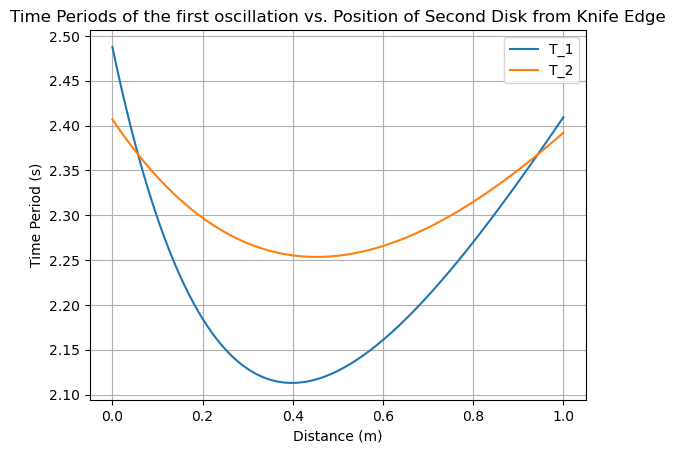

In [4]:
plt.plot(x_3 - P_1, T_1[:,0], label="T_1")
plt.plot(P_2 - x_3, T_2[:,0], label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods of the first oscillation vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

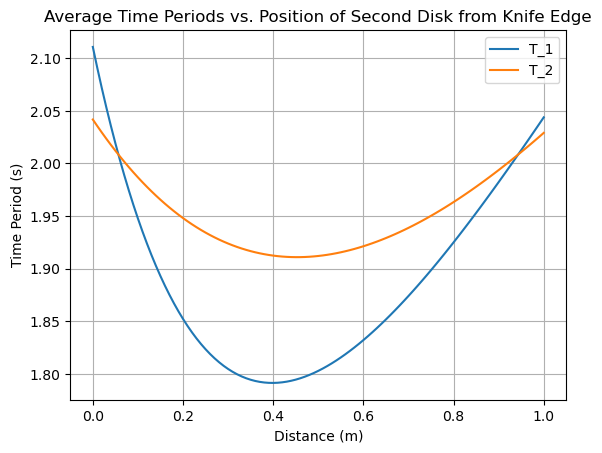

In [5]:
plt.plot(x_3 - P_1, T_1_av, label="T_1")
plt.plot(P_2 - x_3, T_2_av, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Average Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()